# Assignment 6: Basic Machine Learning

Gruppe Dangerous Memory: Jake, Christian, Alexander

https://github.com/datsoftlyngby/soft2019fall-bi-teaching-material/tree/master/week40/assignment_6

## Part 1: Predicting Hackernews Points With Linear Regression in One Variable


### Part 1.1: Data preprocessing
Hand-in a plot that shows time on the x-axis and number of points on the y-axis.

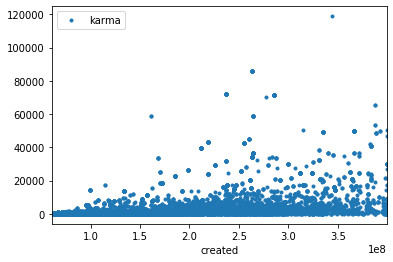

In [12]:
import pandas as pd
users_df = pd.read_json ("users.json") # ['about', 'created', 'error', 'id', 'karma', 'submitted']

users_df_plot = users_df.copy()

#users_df_plot['created'] = pd.to_datetime(users_df_plot['created'], unit='s') # converting from epoch(seconds since) to datetime

users_df_plot['created'] = pd.datetime.now().timestamp() - users_df_plot['created']

ax1 = users_df_plot.plot(x='created', y='karma', style=".")
ax1

### Part 1.2: Model selection
**Describe with at least five lines of text: which model you chose, and why.**

The size of the users dataset is 56586 entries. 

From the task description, "Predicting Hackernews Points With Linear Regression in One Variable", we have a strong indicator of which ML model to choose: Regression.

Taking a look at the scikit-learn ["Choosing the right estimator"](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) chart/cheat-sheet:

The samle is >50, we are not to predict a category, but are to predict quantity, a relevant ML model to use could be [SGD Regressor](https://scikit-learn.org/stable/modules/sgd.html). Furthermore, reading from the SGD Regressor documentation for [Regression](https://scikit-learn.org/stable/modules/sgd.html#regression): *"SGDRegressor is well suited for **regression** problems with a large number of training samples (> 10.000)"*.

### Part 1.3: Model training
Hand-in the code (markdown will do) that trains the data.

Coefficients: 
 [3.38410902e-05]
Mean squared error: 78589344.55
Variance score: 0.14


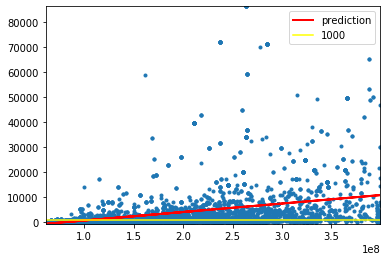

In [11]:
# Modified example code used from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import Bunch


# Remove rows containing na values in created and karma columns
users_df_plot = users_df_plot.dropna(subset=['created', 'karma'])

# Load the dataset
# Container object for datasets: Dictionary-like object that exposes its keys as attributes.
users_bunch = Bunch(created =np.array(users_df_plot['created']), karma=np.array(users_df_plot['karma']))

# Use only one feature
users_bunch_X = users_bunch.created[:, np.newaxis] #users_bunch_X = users_bunch.created[:, np.newaxis, 2]

# Split the data into training/testing sets
users_bunch_X_train = users_bunch_X[:-len(users_bunch_X)//2]
users_bunch_X_test = users_bunch_X[-len(users_bunch_X)//2:]

# Split the targets into training/testing sets
users_bunch_Y_train = users_bunch.karma[:-len(users_bunch.karma)//2] 
users_bunch_Y_test = users_bunch.karma[-len(users_bunch.karma)//2:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(users_bunch_X_train, users_bunch_Y_train)

# Make predictions using the testing set
users_bunch_Y_pred = regr.predict(users_bunch_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(users_bunch_Y_test, users_bunch_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(users_bunch_Y_test, users_bunch_Y_pred))

# Plot outputs
#plt.figure(figsize=(10,10))
plt.scatter(users_bunch_X_test, users_bunch_Y_test, marker=".")
plt.plot(users_bunch_X_test, users_bunch_Y_pred, color='red', linewidth=2)
plt.axhline(y=1000, color='yellow', linestyle='-')

#plt.xticks(())
#plt.yticks(())

# align plots to axis
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.legend(["prediction", "1000"])
plt.show()


### Part 1.4: Model Validation 

1. A one-page description of the model parameters -- number of which are model dependent: Why are they there? What is their purpose in the model? What do they explain for your data? How are they helping you to predict how much time you need to be active in order to gain Hackernews points?

2. A visual plot of the model that explains the description above. In the case of a linear regression this is a line that shows how the model expects how long a user needs to be active (x value) in order to get a certain number of points (y value).

3. Explain: What does it take to get 1000 points? How long would you have to be active on Hackernews?

4. Explain: how you have sanity checked your resulting trained/validated model: What does it take to get 1000 points? 500 points? 10000 points? 100 points? How long would you have to be active on Hackernews in those cases?

## Part 2: Predicting Hackernews Points With Multivariate Linear Regression

- A description of the parameters
- An analysis of how much time you need to be active on Hackernews, plus how many posts you need to reach 1000 points.
- Explain: how much does the number of posts contribute to get the points? How much do the time since registration explain?

## Part 3: Prediction of breast cancer malignity

### Part 3.1: Looking at the data - Report the head of the table. Write two lines about notable features of the data. How big is your dataset? What are the different variables? Etc...?

### Part 3.2: Building the model - Hand-in a description of your chosen variables and why you think they could help predict breast cancer.

### Part 3.3 Evaluating the model 

- the accuracy of the score
- five lines describing what that number of accuracy actually means.
is the data set 'balanced'?
- should a ROC curve-based or perhaps a precision-recall optimization be used here?
- what can the number tell you when you inform patiens whether their cancer is benign or malign?
- do you dare do synthetic minority oversampling synthesis (SMOTE) -- if needed (check labelling 'balance') -- on this data to obtain higher accuracy? (this is a serious question if you are working in health care for real!)